In [27]:
from imblearn.over_sampling import SMOTE
from torchvision import datasets, transforms, models
import os
import pandas as pd
from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

# Reading data

In [2]:
path = 'data/train'

In [3]:
def get_data(fulldir):
    classes = os.listdir(fulldir)
    classes.remove('.DS_Store')
    classes.sort()
    class_to_idx = dict(zip(classes, range(len(classes)))) 
    idx_to_class = {v:k for k,v in class_to_idx.items()}
    resizer =  transforms.Resize((324,324))
    convert_tensor = transforms.ToTensor()
    X = []
    y = []
    for i, label in idx_to_class.items():
        path = fulldir+"/"+label
        for file in tqdm(os.listdir(path)):
            X.append(torch.unsqueeze(convert_tensor(resizer(Image.open(path+'/'+file).convert('RGB'))),0))
            y.append(i)
    
    return torch.cat(X,dim=0),y, class_to_idx, idx_to_class
X,y, class_to_idx, idx_to_class = get_data(path)

100%|██████████| 385/385 [00:06<00:00, 60.14it/s]


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [5]:
def smote_balance(X_train,y_train):
    X_resampled, y_resampled = SMOTE().fit_resample(X_train.reshape(len(X_train),-1), y_train)
    return X_resampled.reshape((len(X_resampled),3,324,324)), y_resampled

In [6]:
X_resampled, y_resampled = smote_balance(X_train,y_train)

In [7]:
np.unique(np.array(y), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([263, 390, 287, 611, 221, 475, 654, 221, 516, 231, 496, 385]))

In [8]:
np.unique(np.array(y_resampled), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([523, 523, 523, 523, 523, 523, 523, 523, 523, 523, 523, 523]))

In [9]:
class PlantDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.transform = transform
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        item = self.X[idx]
        if self.transform:
            item = self.transform(item)
        return item, self.y[idx]

In [15]:
train_dataset = PlantDataset(X_resampled,y_resampled)
val_dataset = PlantDataset(X_val,y_val)

# Transformation
    Scaling
    Cropping
    Flipping
    Rotation
    Translation
    Adding Noise
    Changing lighting conditions
    Advanced techniques like GAN

In [177]:
noiser(totensor(train_dataset[0][0])).size()

torch.Size([324, 3, 324])

In [180]:
totensor(train_dataset[0][0]).size()

torch.Size([324, 3, 324])

In [173]:
noiser = RandomAddGaussianNoise()
noiser(totensor(train_dataset[0][0]))

tensor([[[ 0.4200,  0.7919,  0.2362,  ...,  0.3527,  0.1907,  0.4167],
         [ 0.6507,  0.3703,  0.0978,  ..., -0.1429,  0.1313,  0.0072],
         [ 0.7547,  0.2977,  0.8205,  ..., -0.0350,  0.1750,  0.0251]],

        [[ 0.7814,  0.7458,  0.2929,  ...,  0.1157,  0.1245,  0.4434],
         [ 0.4630,  0.4143,  0.3022,  ...,  0.2704, -0.2738,  0.0306],
         [ 0.5257,  0.7479,  0.4119,  ...,  0.0826, -0.0094,  0.0869]],

        [[ 0.8872,  0.4132,  0.3419,  ...,  0.2692,  0.6163, -0.0102],
         [ 0.4471,  0.1788, -0.0032,  ...,  0.5976,  0.4776, -0.0792],
         [ 1.1481,  0.3636,  0.6551,  ...,  0.3500,  0.2192,  0.3033]],

        ...,

        [[-0.0028,  0.6075,  0.1959,  ...,  0.4339,  0.7960,  0.9400],
         [ 0.2778,  0.1932,  0.5241,  ...,  0.1452,  0.8646,  0.5878],
         [ 0.1691,  0.1462,  0.2060,  ...,  0.7280,  1.1127,  0.9280]],

        [[ 0.2645,  0.0994,  0.4019,  ...,  0.9087,  0.5266,  1.0678],
         [ 0.5035,  0.3921,  0.5916,  ...,  0.6826,  0.

In [74]:
totensor = transforms.ToTensor()


In [141]:
class RandomAddGaussianNoise(object):
    def __init__(self, mean=0., std=0.25,prob=0.5):
        self.std = std
        self.mean = mean
        self.prob = prob
        
    def __call__(self, tensor):
        if np.random.choice(a=[0,1], p=[1-self.prob,self.prob]):
            return tensor + torch.randn(tensor.shape) * self.std + self.mean
        else:
            return tensor
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)


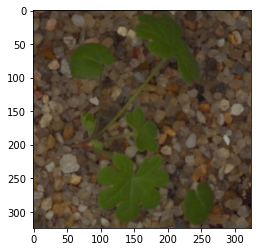

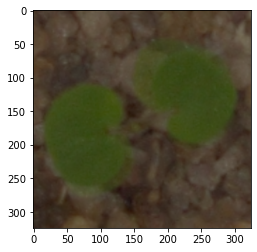

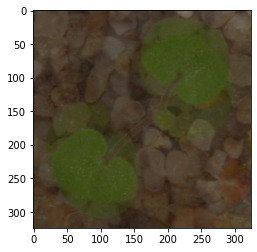

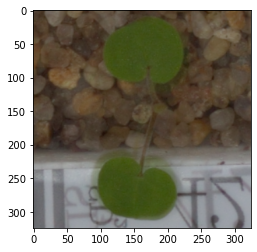

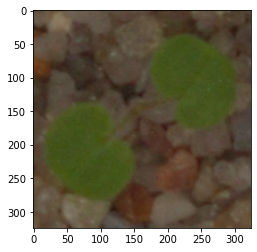

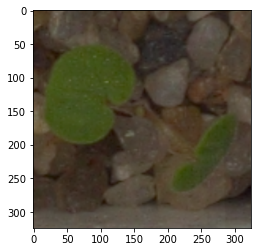

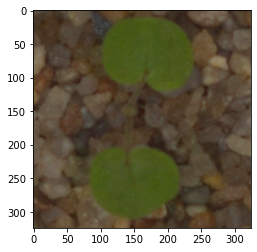

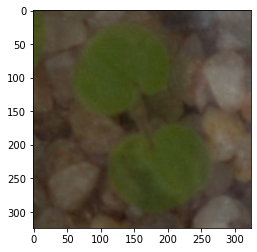

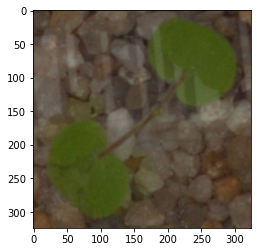

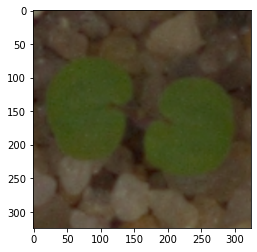

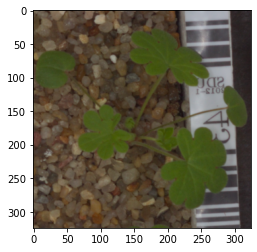

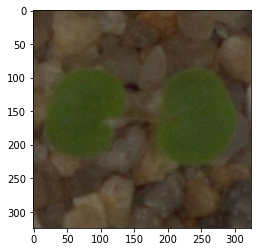

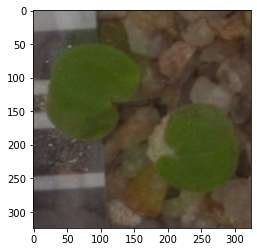

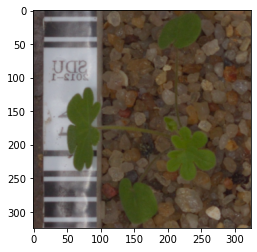

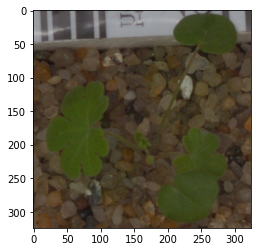

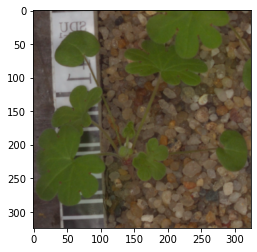

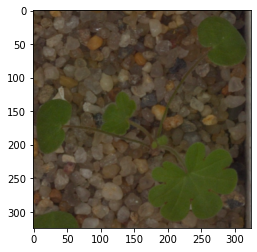

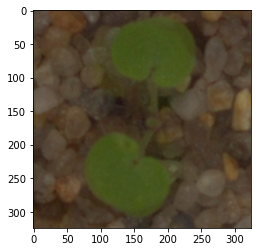

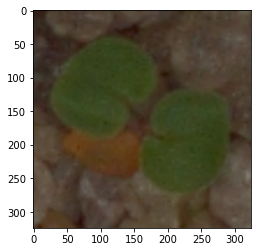

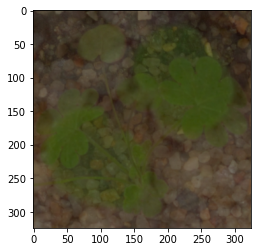

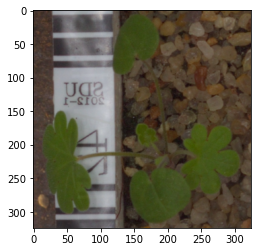

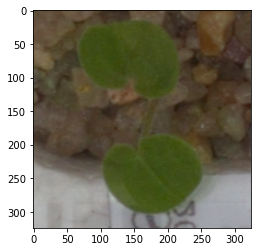

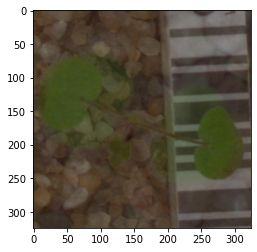

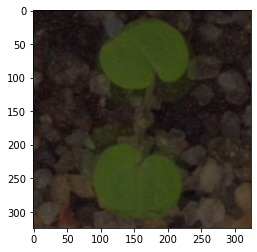

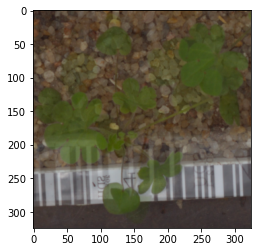

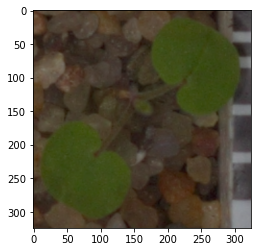

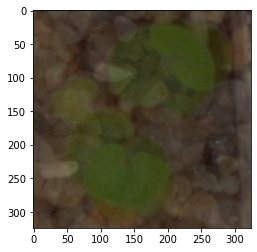

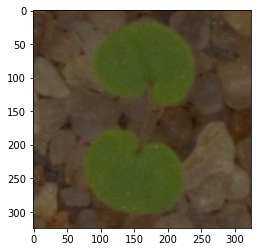

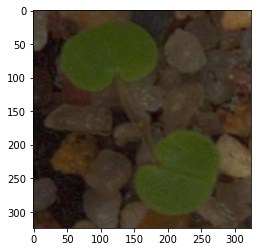

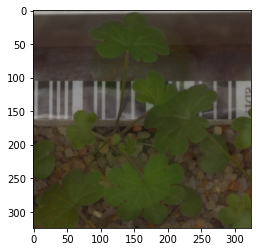

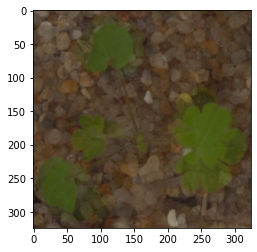

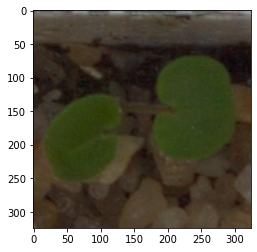

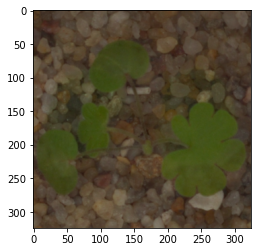

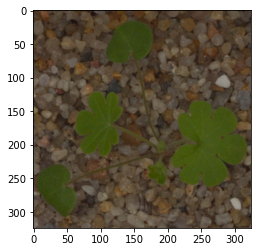

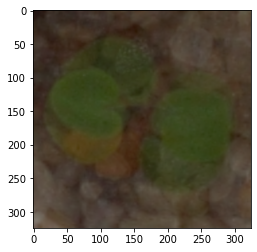

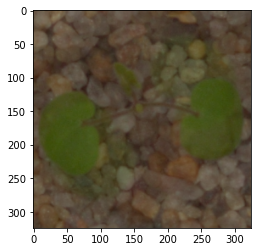

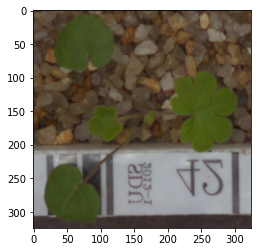

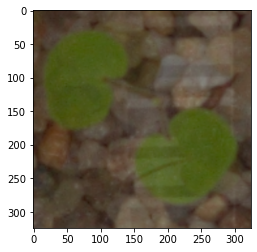

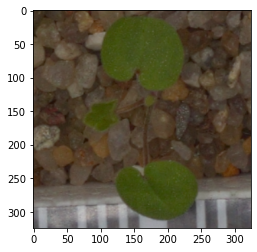

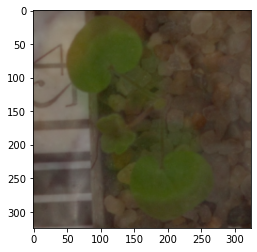

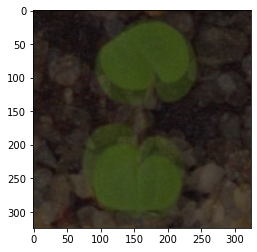

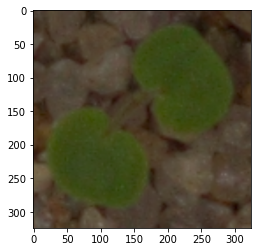

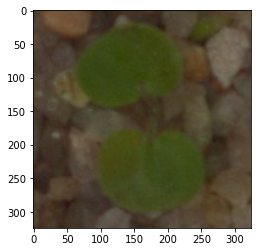

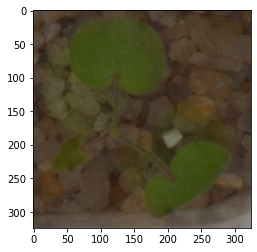

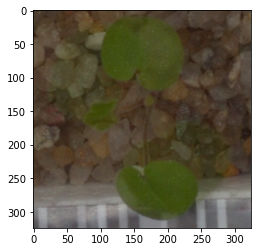

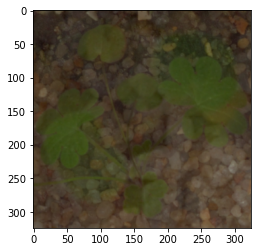

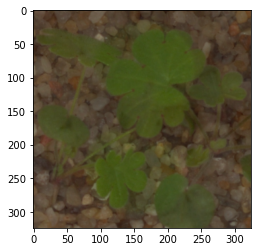

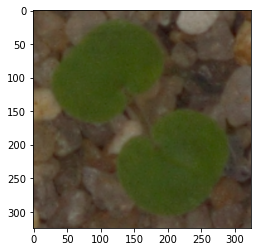

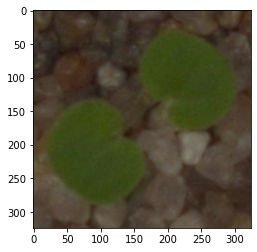

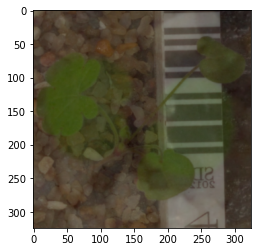

In [26]:
train_transform = transforms.Compose([
    transforms.ToTensor()
    transforms.RandomRotation(180),
    transforms.RandomAffine(degrees = 0, translate = (0.2, 0.2)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    RandomAddGaussianNoise(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])